In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
from wordcloud import WordCloud

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(20,10))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

#판다스 컬럼 다보기
pd.set_option('display.max_columns', 100)

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
#elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    #plt.rc('font', family='Malgun Gothic')



# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [4]:
df =pd.read_csv('/Users/monica_air/Documents/Yuns/Telemedicine/20200226_0729_telemedicine.csv',
)
df.head(1)

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,박영숙유엔미래포럼,@UNfuture,2021-07-22T22:47:40.000Z,[원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다...,NaN,NaN,NaN,NaN


In [21]:
df = df.sort_values(by='Timestamp', ascending=False)
df.head(1)

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets
0,박영숙유엔미래포럼,@UNfuture,2021-07-22T22:47:40.000Z,[원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다...,NaN,NaN,NaN,NaN


#####  Timestamp

In [22]:
time_list = df['Timestamp'].tolist()
print(time_list[0])
print(time_list[-1])

2021-07-22T22:47:40.000Z
2020-07-07T00:11:56.000Z


In [36]:
df.iloc[700].Text

'미국의 의료비용은 GDP의 17%입니다.\nOECD 평균이 10%인 것에 비하면 미국은 아주 높은 의료비용을 부담하고 있습니다.\n이런 높은 의료비용을 낮추는 것은 국가적 문제로 인식됩니다. \n이런 맥락에서 원격의료는 굉장히 좋은 수단입니다.'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 700
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserName   701 non-null    object 
 1   Handle     679 non-null    object 
 2   Timestamp  701 non-null    object 
 3   Text       701 non-null    object 
 4   Emojis     64 non-null     object 
 5   Comments   115 non-null    float64
 6   Likes      173 non-null    float64
 7   Retweets   216 non-null    float64
dtypes: float64(3), object(5)
memory usage: 49.3+ KB


In [37]:
df.isnull().sum()

UserName       0
Handle        22
Timestamp      0
Text           0
Emojis       637
Comments     586
Likes        528
Retweets     485
dtype: int64

In [8]:
review_length = df['Text'].astype(str).apply(len)
review_length.head()

0    233
1    330
2     75
3     24
4     67
Name: Text, dtype: int64

### Data cleansing

In [38]:
data = df.copy()

In [39]:
text_list = data.Text.tolist()

In [41]:
import re

In [94]:
text_list[1]

'[ainet] [원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다. Infermedica의 파트너십 책임자인 Maciej Malenda가 원격 의료와 AI가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다.≪ainet≫ [원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다. Infermedica의 파트너십 책임자인 Maciej Malenda가 원격...\n코로나19가의료계에인공지능(AI)의가능성을밝혀주었다는사실은부인할 수없다.얼마전까지만해도원격의료는현실보다과장된것으로여겨졌지만대유행으\nainet.link'

In [65]:
#text에서 링크추출

non_kor = []

for i in text_list:
    m = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$\-@\.&+:/?=]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', i)
#     if(text!=''):
#         text = i+'링크없음'
    non_kor.append(m)
data['link']=non_kor
data.head(1)

,UserName,Handle,Timestamp,Text,Emojis,Comments,Likes,Retweets,link
0,박영숙유엔미래포럼,@UNfuture,2021-07-22T22:47:40.000Z,[원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다...,NaN,NaN,NaN,NaN,[]


In [87]:
def clean_text(text):
    cleaned_text = re.sub('[a-zA-z]','',text)
    cleaned_text = re.sub('[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"\♥\♡\ㅋ\ㅠ\ㅜ\ㄱ\ㅎ\ㄲ\ㅡ]','',cleaned_text)
    return cleaned_text


In [90]:
only_kor = []

for i in text_list:
    cleaned_text = clean_text(i)
    cleaned_text = cleaned_text.strip('\n')
    only_kor.append(cleaned_text)
    

only_kor[0]

'원격의료 원격 의료와 가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다 의 파트너십 책임자인  가 원격 의료와 가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다         \n    '

In [66]:
#한글만 남기기 
import re

def test():
    s='韓子는 싫고, 한글은 nice하다. English 쵝오 -_-ㅋㅑㅋㅑ ./?!'
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자
  # hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')  # 위와 동일
    result = hangul.sub('', s) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    print (result)
    result = hangul.findall(s) # 정규식에 일치되는 부분을 리스트 형태로 저장
    print(result)

test()


는 싫고 한글은 하다  쵝오 ㅋㅑㅋㅑ 
['韓子', ',', 'nice', '.', 'English', '-_-', './?!']


#####  띄어쓰기

In [ ]:
# from pykospacing import Spacing
#텐서오류

In [98]:
from hanspell import spell_checker

In [108]:
#띄어쓰기 없는 문장 만들기

no_space = []

for i in only_kor:
    i = i.replace(' ','')
    no_space.append(i)

no_space[0]

'원격의료원격의료와가의료서비스제공자의시간과비용을절약할수있다의파트너십책임자인가원격의료와가의료부문에서시간과비용을절약하는데어떻게도움이되는지논의한다\n'

In [110]:
text_list[0]

"[원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다. Infermedica의 파트너십 책임자인 Maciej Malenda가 원격 의료와 AI가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다.Buyer's Guide & Reviews - Good guides before you buy\nGood guides before you buy\nguidestobuy.com"

In [ ]:
for i in only_kor:
    j = spell_checker.check(i)
    i = j.checked
    print(i)

원격의료 원격 의료와 가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다의 파트너십 책임자인  가 원격 의료와 가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다             
 원격의료 원격 의료와 가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다의 파트너십 책임자인  가 원격 의료와 가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다≪≫ 원격의료 원격 의료와 가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다의 파트너십 책임자인  가 원격코로나 19가 의료계에 인공지능의 가능성을 밝혀 주었다는 사실은 부인할 수 없다 얼마 전까지만 해도 원격 의료는 현실보다 과장된 것으로 여겨졌지만 대유행의
의료계도 메타버스 시동… 원격의료 논란 재점화시키나 출처  헬스조선  네이버 뉴스 57
코로나 테마주 중엔 원격의료코로나 피해주들 상승
4얘기도 나오는 듯일요일에 수도권 비수도권 연장 여부 발표오늘 코로나 테마주 중에서 원격의료를메타버스랑 엮어서 펌핑
● 타고난 뱃속의 오장 육부 허실 음양오행 성분 사상체질 만병의 원인 뿌리는 사주팔자의역동원천명학로만 보실수원격체질진단원격의료헬스케어 하실수 있습니다 체질 만세력 어플 출처  블로그● 타고난 뱃속의 오장 육부 허실 음양오행 성분 사상체질 만병의 원인 뿌리는 사주팔자의역동원천명학로만 보실수원격체질진단원격의료헬스케어 하실수 있습니다 체질 만세력 어플● 사주풀이 사상체질 만성병 천명 학위 역학 60년 이상 전통 명리학과 원리원칙이 크게 다릅니다
코스로 원격의료산업협의회 출범…합리적 규제 개혁 방향 제시 46
코리아 스타트업 포럼 원격의료산업협의회 출범… “의료계와 적극 소통 협력 방안 마련할 것” 스타트업 뉴스 출처 코리아 스타트업 포럼 원격의료산업협의회 출범… “의료계와 적극 소통 협력 방안 마련할 것”플래 텀은   ’을 모토로 하는 스타트업 전문 미디어입니다
 인피니트헬스케어 071200 원격의료 필수 소프트웨어 선도 기업 20210720 김상표 키움증권59

211 님 301411 님  님에게 보내는 답글 대면 진료는 중환자가 거의 없는 1차 진료기관에 한정해야 한다는 말씀도 하시네요 사실 대형 병원 의사 상담은 기껏 2 3분으로 몇 가지 질문하고 처방하시면 끝이라 원격의료해도 되지 않나 그란 생각이 들기도 하더구먼요
301411 님 211 님  님에게 보내는 답글 그러게 저도 좀 걱정이 되더라고요 대면진료는 곧 원격의료로 진행되는 거 아닌가 그런데 동영상 보니까 안철수 대표님이 저길 방문한 이유도 그런 우려를 현장에서 어떻게 풀고 있는가 살펴보려는 거였네요
지난 15년간 우먼 온 웹은 여러 연구진과 협력하여 임신 중단에 대한 접근권 및 원격의료 임신 중단에 대한 연구를 약 20개 발간했습니다 최근에는 2009120201 간의 사례를 연구한 가장 복합적이고 종합적인 10년 평가서를 발간하였습니다
0919 님에게 보내는 답글 동료였던 의료인들의 반대가 분명하게 보임에도 원격의료 스타트업에 관심을 표하시는 걸 보면 담대하게 국민만 본다는 생각이 듭니다세상에 없던 정치인입니다부디 결실을 맺기를 바랍니다
202106034356623… 中 원격의료 전문 의사 25만 명… 美 선 아마존·구글도 뛰어들었다中 원격의료 전문 의사 25만 명… 美 선 아마존·구글도 뛰어들었다中 원격의료 전문 의사 25만 명… 美 선 아마존·구글도 뛰어들었다  코로나로 불붙은 원격의료 2 해외 의료진은 긍정 평가
中 원격의료 전문 의사 25만 명… 美 선 아마존·구글도 뛰어들었다中 원격의료 전문 의사 25만 명… 美 선 아마존·구글도 뛰어들었다中 원격의료 전문 의사 25만 명… 美 선 아마존·구글도 뛰어들었다  코로나로 불붙은 원격의료 2 해외 의료진은 긍정 평가
5부 급증하는 20대 임차인 「월세 급등」 원격의료 바람 잡는 「조선」  무법천지 코인 20210602 정치분석  2부 주식・부동산・코인・재난지원금  돈과 엿 바꿔 먹은 천박한 한국 민주제 5부 급증하는 20대 임차인 「월세 급등」 원격의료 바람 잡는 「조선」  무법천지 코인 2021060

최신 기술 분야별 보고서 및 세미나 북 안내 업데이트 20210413104945…디스플레이 그린 뉴딜 점접착 신소재 데이터 경제 빅데이터 원격의료 디지털 헬스케어 도심 항공 식품산업 수소차 전기차 첨단소재 폐자원  부품 소재 보고서 세미나 북 도서 테크포럼
최신 기술 분야별 보고서 및 세미나 북 안내 업데이트 20210413104945…디스플레이 그린 뉴딜 점접착 신소재 데이터 경제 빅데이터 원격의료 디지털 헬스케어 도심 항공 식품산업 수소차 전기차 첨단소재 폐자원  부품 소재 보고서 세미나 북 도서 테크포럼
이런 처방 해결치 윤미래 예측 예방의학은 반드시 사주팔자음양오행천지운기 법칙 작용 하느님 天道 육상 체질 만성병 의학을 보셔야만 아실 수원 격세 질지는 단 원격의료 헬스케어 600조 시장 황금알 낳는 거위 산업체질 천연물 신약 개발 전 세계 1천 조 시장 국내 건강기능식품 년 20조 이상 시장
원격의료 왜 의료민영화와 삼성 특혜의 출발점인가 00000695435… … 삼성의 한미 폐기 기고 원격의료 왜 의료민영화와 삼성 특혜의 출발점인가  민중의 소리박근혜 정부의 ‘원격의료’ 사랑이 놀라울 정도다 5월 창조경제와 연동해서 ‘원격의료’를 대통령이 직접 거론하는가 하면 당시 보건복지부 장관도 ‘원격의료’ 허용을 거들고 나섰다 6월에는 지난 정부와 국회에서 여러 가지 문제점으로 폐기된 ‘원격의료’ 허용 의료법 개정안을 새누리당 심재철 의원이 국회에 대표 발의했다 그런데 이것으로도 모자란 것인지
박영선 후보의 공약에는 공공의료 확충이라는 슬로건이 붙었지만 그럴듯한 선언일뿐 공공병원 증설과 확대를 위한 구체적인 계획은 찾기 어렵다 대신 원스톱 헬스케어 센터라는 이름으로 원격의료와 민간기업 건강관리 서비스를 제시했고
문재인이 밀어붙이는 원격의료는 한미에 걸려서 되돌릴 수가 없단다 의료민영화에 고속도로 만들어주는 한미 이보다 공포스러운 일이 어디 있을까 한미 폐기
문재인이 의료민영화 방지법을 제안할 수 있는가 영리병원 관련 법을 개정할 수 있는가 의약품 특허 연계 문

이게 뭔 소리  코로나 시기에 의료민영화 공약 내놓은 박영선 이러고도 서울시장 되려는가 서울시민의 민감한 의료 정보를 기업 돈벌이를 위해 넘기려는 계획 중단해야원격의료·기업 건강관리 같은 의료영리화가 아니라 공공병원·의료 인력 확충해 위기대응역량 갖춰야 130312039660…
08961 님에게 보내는 답글 그거 기사 내용 읽어보셨어요 원격의료제도화에 대한 주장을 의료민영화라고 의협 쪽에서 비난하는 상황인데
로 들어온 헬스장…“원격의료 진화는 록부터” 2021012102112…
 님  님 2 님에게 보내는 답글 나도 별로이지만 정확하게는 의료민영화 아님 동네의원과 약국을 연결해 환자 데이터를 공유하면서 권역별 대형병원과 연계하는 방식의 바이오헬스 클러스터를 구축하고 이를 운영할 서울시 보건의료 데이어 센터를 설립하겠다 아마 원격의료를 염두에 둔 것 같음 당연히 의료계는 반대함
2021년 달라지는 법무정책 종합 편▲가정폭력 엄정 대응 ▲국가송무 체계 개선▲전자여행 허가 제도 도입▲출입국사범 제도 개선▲변호사시험 시험장 전국 확대▲교정기관 원격의료 확대▲교정기관 수형자 중장비 직업훈련 확대법무부 달라지는 법무정책 종합 편 2021 달라지는 법무정책 대한민국 법무부
이럴 거면 원격의료를 하는 게 낫지 않나 오늘따라 유독 심하네 외래 환자 10명 이상이 대진이네  대진은 잘라야겠다
원격의료 왜 의료민영화와 삼성 특혜의 출발점인가 00000695435… … 삼성의 한미 폐기 기고 원격의료 왜 의료민영화와 삼성 특혜의 출발점인가  민중의 소리박근혜 정부의 ‘원격의료’ 사랑이 놀라울 정도다 5월 창조경제와 연동해서 ‘원격의료’를 대통령이 직접 거론하는가 하면 당시 보건복지부 장관도 ‘원격의료’ 허용을 거들고 나섰다 6월에는 지난 정부와 국회에서 여러 가지 문제점으로 폐기된 ‘원격의료’ 허용 의료법 개정안을 새누리당 심재철 의원이 국회에 대표 발의했다 그런데 이것으로도 모자란 것인지
저런 곳에 살고 싶다 혁신가의 기술을 옆에서 지켜볼 수 있는 곳 한국은 현재 우버도 못 들어

한국선 꽉 막힌 원격의료…네이버 일본서 서비스 시작  매일경제 한국 선 꽉 막힌 원격의료…네이버 일본서 서비스 시작  매일경제日 자회사 라인 라인 닥터 론칭 앱으로 병원 예약·결제 한방에 진료는 의사와 영상통화로 코로나에 원격의료 속도전 中 알리페이·바이두 힘 합쳐 온라인 의사 상담 플랫폼 구축 한국은 의사들 반대에 막혀
디지털 무역 中 서비스 무역 발전의 성장 핵심으로222176908010…특히 올해 코로나 19 기간 온라인 재택근무 원격의료 온라인 교육 등 디지털 경제가 널리 보급되면서 디지털의 ‘날개를 단 신新 무역 형태가 중국 경제 발전을 이끄는 새로운 성장 핵심으로 부상한 것이다
 님에게 보내는 답글 없어요  제가 혼자 살고 부모님 남양주인데 여기서 최소 2시간 거리고  친한 친구 중엔 운전하는 친구들이 별로 없어요 센터에 일단 보고는 했는데 원래 원격의료 상담은 부담되는 거 아는데 119나 1339에 물어봐도 오히려 잘 모르니까 죄송해요 언니
 님에게 보내는 답글 원격의료 관련 주 상투했다가 반 토막 손절하고 옮겨서 원금 간신히 건졌습니다 
방역 타령하고 무슨 뉴딜 정책 발표할 때 그 안에 돌봄 대책은 1도 없었다 원격의료는 있는데 돌봄을 안 해 본 사람들이 만든 대책이라서 그런 건가
1234 님에게 보내는 답글 시리즈 상투하기 ㅊ한 것 같던데 그리고 인공지능 자율 주행 원격의료 3프린터 등등 지금 한창 개발 진행 중인 거 기업 재무제표 보고 드가면 35년 은 뚝딱임
원격의료 왜 의료민영화와 삼성 특혜의 출발점인가 00000695435… … 삼성의 한미 폐기 기고 원격의료 왜 의료민영화와 삼성 특혜의 출발점인가  민중의 소리박근혜 정부의 ‘원격의료’ 사랑이 놀라울 정도다 5월 창조경제와 연동해서 ‘원격의료’를 대통령이 직접 거론하는가 하면 당시 보건복지부 장관도 ‘원격의료’ 허용을 거들고 나섰다 6월에는 지난 정부와 국회에서 여러 가지 문제점으로 폐기된 ‘원격의료’ 허용 의료법 개정안을 새누리당 심재철 의원이 국회에 대표 발의했다 그런데 이것으로도 

##### 불용어제거

/var/folders/kx/wntkz3hj61bd2_ss_s_4d1km0000gn/T/ipykernel_1446/1476555457.py:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

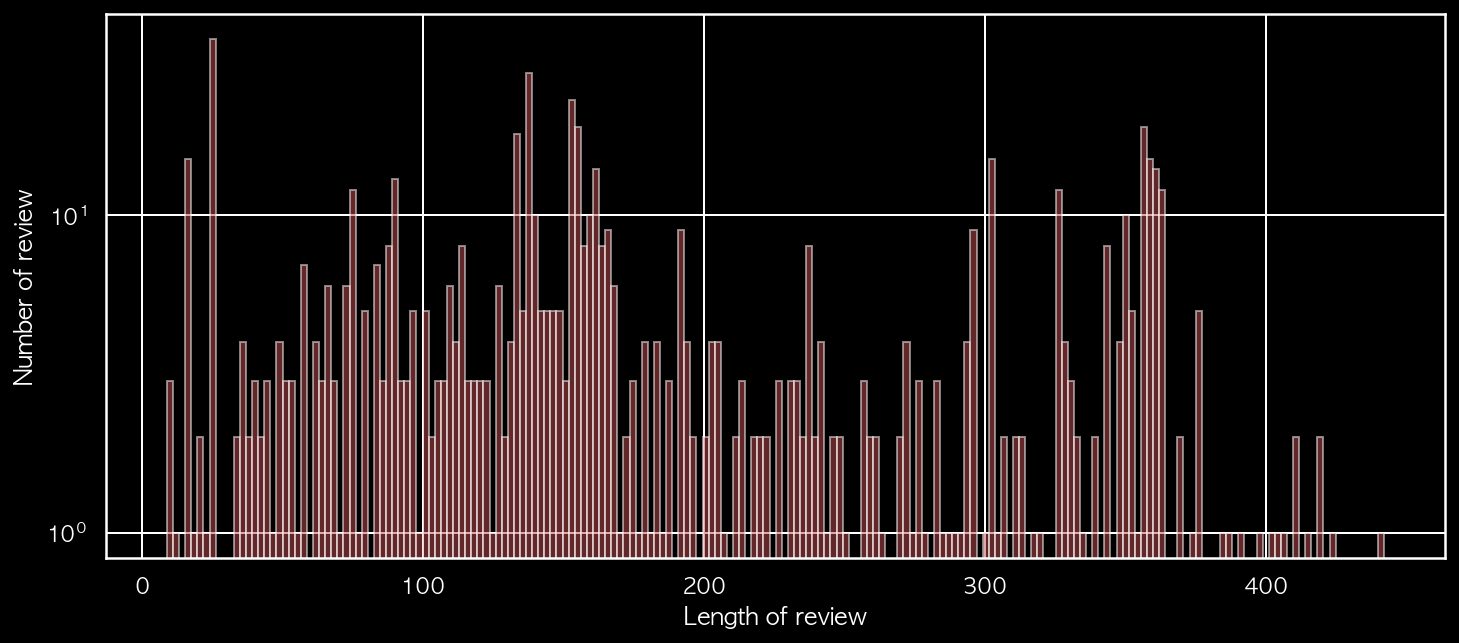

In [9]:
# 그래프에 대한 이미지 사이즈 선언
plt.style.use('dark_background')
plt.figure(figsize=(12, 5))
plt.hist(review_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip') 

# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review') # comment가 없는게 제일 많음

In [10]:
print('리뷰 길이 최대 값: {}'.format(np.max(review_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(review_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(review_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(review_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(review_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(review_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(review_length, 75)))

리뷰 길이 최대 값: 442
리뷰 길이 최소 값: 9
리뷰 길이 평균 값: 182.99
리뷰 길이 표준편차: 110.52
리뷰 길이 중간 값: 156.0
리뷰 길이 제 1 사분위: 97.0
리뷰 길이 제 3 사분위: 286.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cb083d310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cb083d970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cb0831e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cb08440d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cb0844610>],
 'means': [<matplotlib.lines.Line2D at 0x7f8cb08443d0>]}

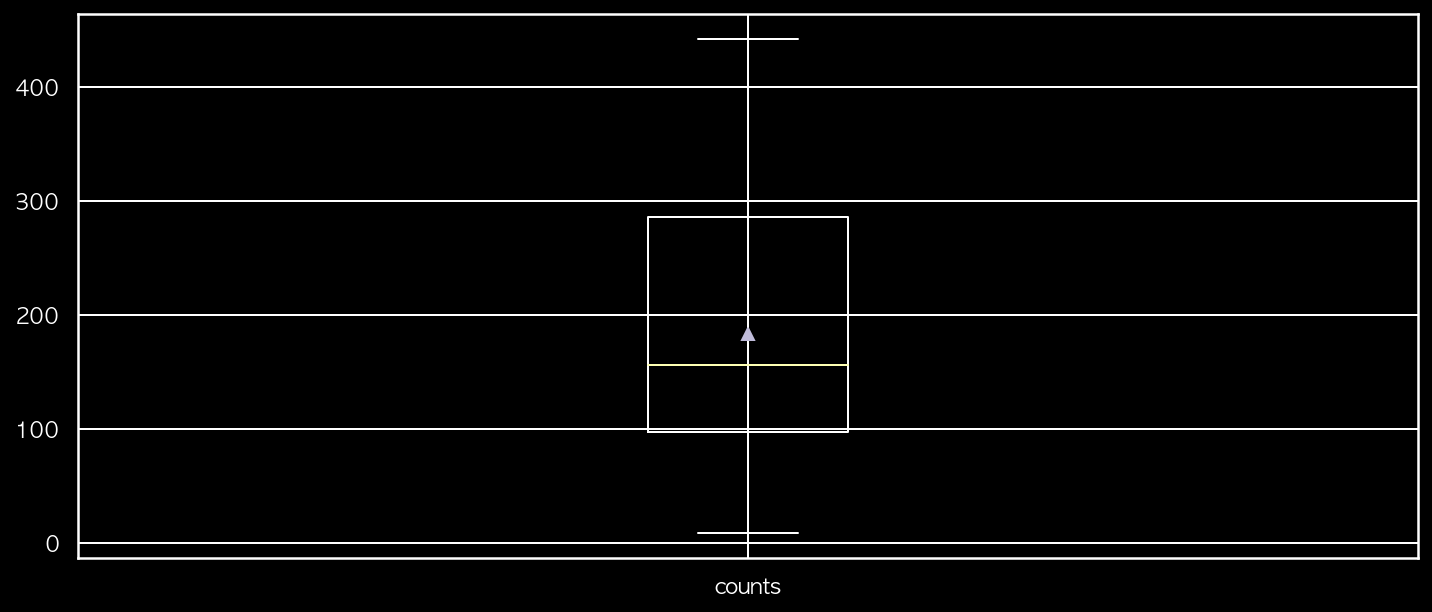

In [11]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(review_length,
             labels=['counts'],
             showmeans=True) # 길이가 긴 데이터가 꽤 있음

In [12]:
# str 아닌 것 제거
train_review = [review for review in df['Text'] if type(review) is str]
train_review

["[원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다. Infermedica의 파트너십 책임자인 Maciej Malenda가 원격 의료와 AI가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다.Buyer's Guide & Reviews - Good guides before you buy\nGood guides before you buy\nguidestobuy.com",
 '[ainet] [원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다. Infermedica의 파트너십 책임자인 Maciej Malenda가 원격 의료와 AI가 의료 부문에서 시간과 비용을 절약하는 데 어떻게 도움이 되는지 논의한다.≪ainet≫ [원격의료] 원격 의료와 AI가 의료 서비스 제공자의 시간과 비용을 절약할 수 있다. Infermedica의 파트너십 책임자인 Maciej Malenda가 원격...\n코로나19가의료계에인공지능(AI)의가능성을밝혀주었다는사실은부인할 수없다.얼마전까지만해도원격의료는현실보다과장된것으로여겨졌지만대유행으\nainet.link',
 '의료계도 메타버스 시동… 원격의료 논란 재점화시키나? (출처 : 헬스조선 | 네이버 뉴스) http://naver.me/F5bHrGx7',
 '코로나테마주중엔 원격의료\n코로나피해주들 상승',
 '4+a얘기도 나오는듯\n일요일에 수도권/(비수도권) 연장여부 발표\n오늘 코로나테마주중에서 원격의료를\n메타버스랑 엮어서 펌핑',
 '● 타고난 뱃속의 오장육부(허실=음양오행 성분(사상체질=만병의 원인,뿌리)는 사주팔자(의역동원=천명학)로만 보실수(원격체질진단,원격의료,U헬스케어) 하실수 있습니다 체질만세력(어플 (출처 : 블로그)● 타고난 뱃속의 오장육부(허실=음양오행 성분(사상체질=만병의 원인,뿌리)는 사주팔자(의역동원=천명학)로만 보실수(원격체질진단,원격의료,U헬스케어) 하실수 있습니다 체질만세력(어플\n● #사주풀이( #사상체질 #만성병) #c

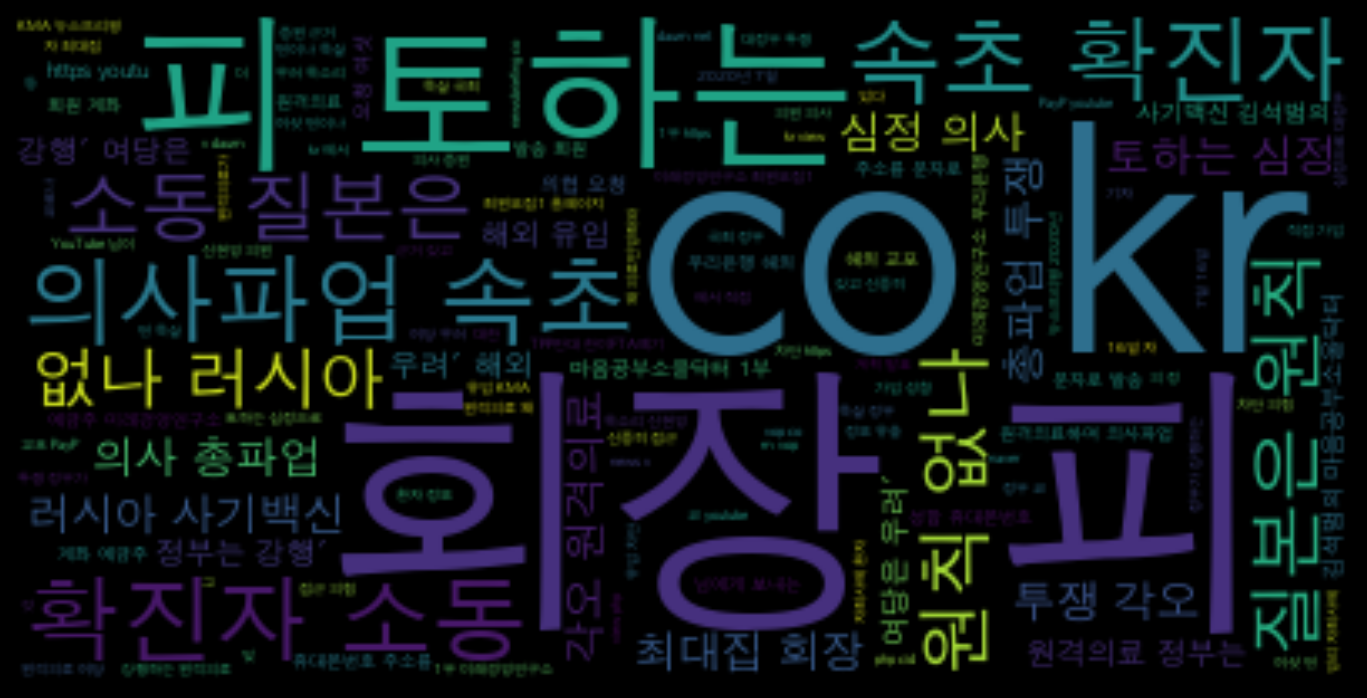

In [13]:
wordcloud = WordCloud(font_path ='AppleGothic.ttf').generate(' '.join(train_review))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation = 'bilinear') # 글자의 배열 형태를 bilinear로 지정, 2개의 선??
plt.axis('off') # x, y 축 나오지 않게하기
plt.show()

In [12]:
word_counts = df['Text'].astype(str).apply(lambda x:len(x.split(' ')))

/var/folders/kx/wntkz3hj61bd2_ss_s_4d1km0000gn/T/ipykernel_17873/493522084.py:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

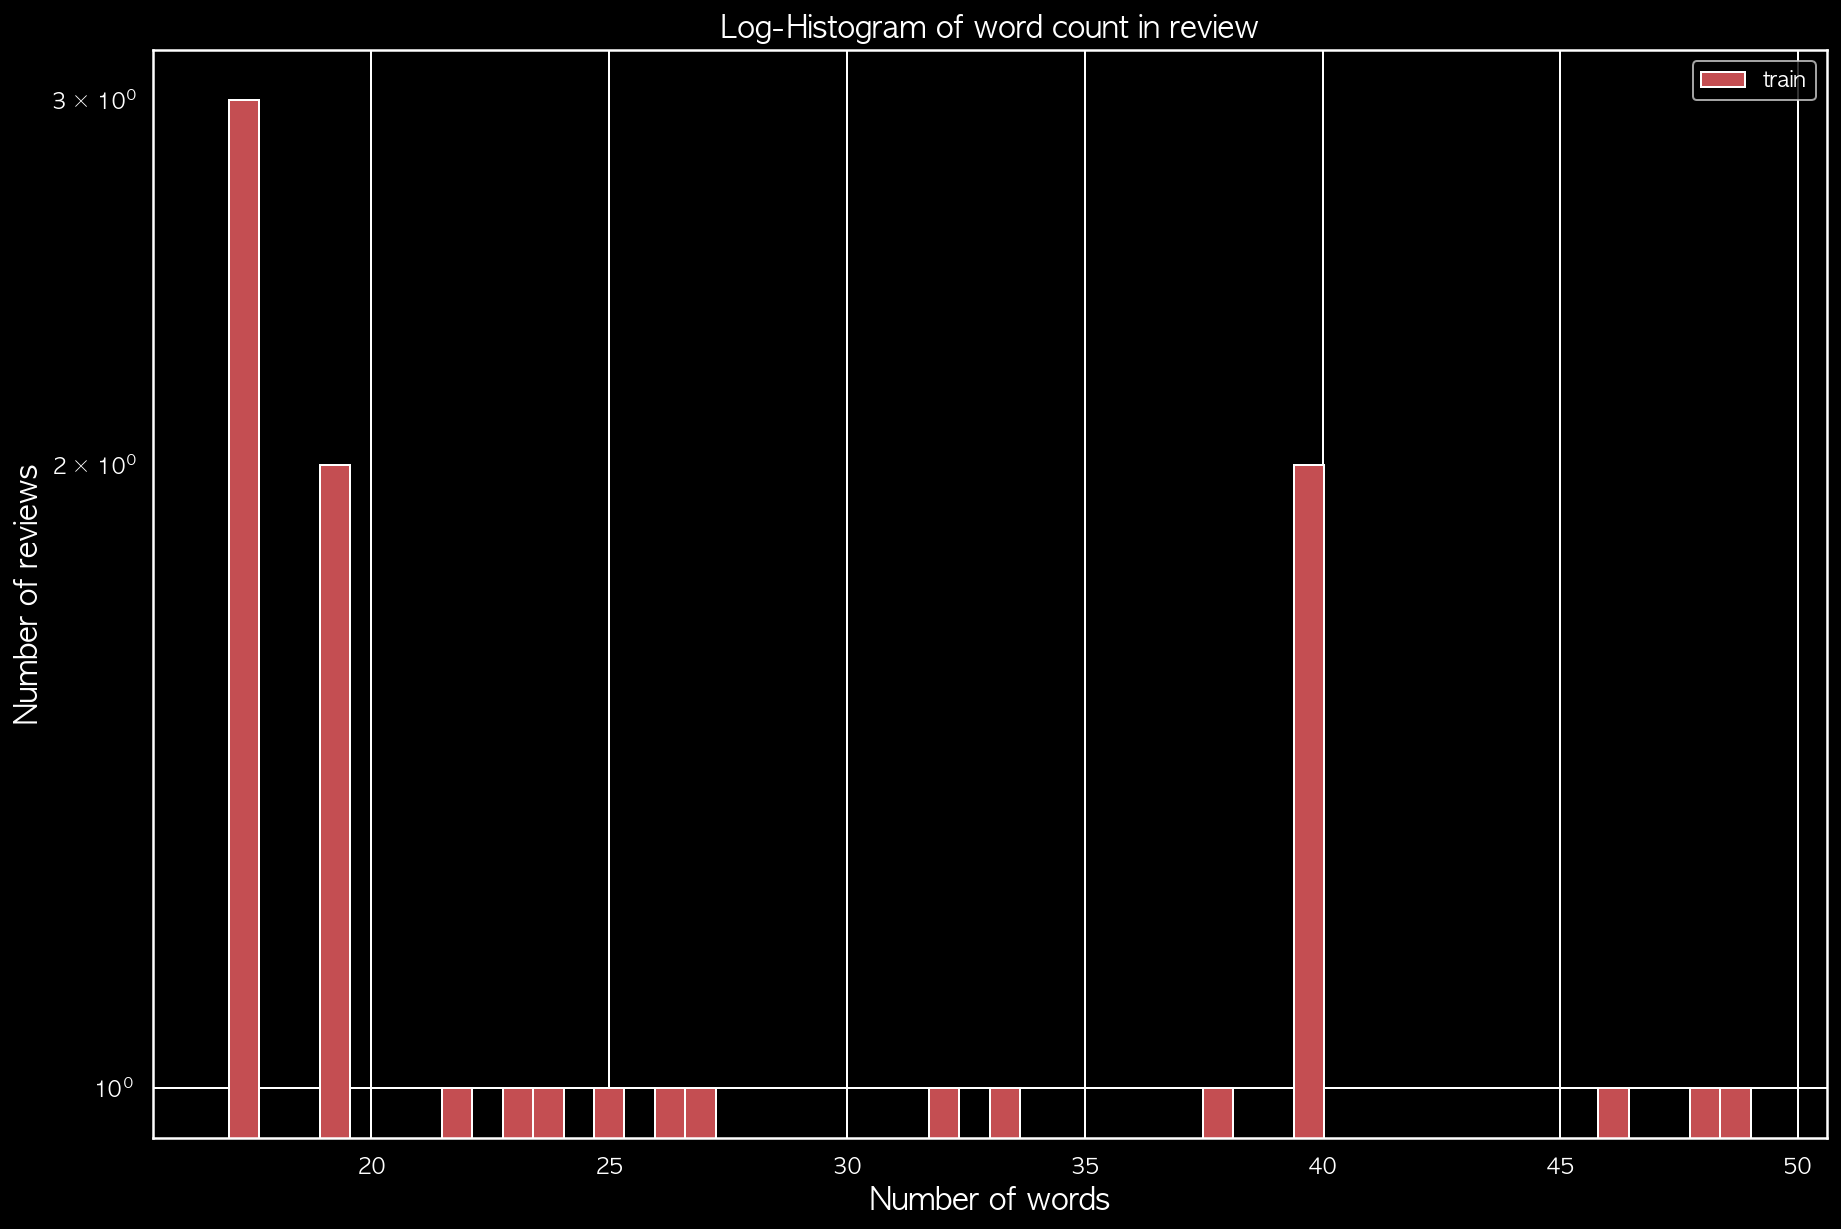

In [13]:
plt.figure(figsize=(15, 10))
plt.hist(word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [14]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(word_counts, 75)))# 최대 단어 개수를 6, 7개

리뷰 단어 개수 최대 값: 49
리뷰 단어 개수 최소 값: 17
리뷰 단어 개수 평균 값: 29.58
리뷰 단어 개수 표준편차: 10.67
리뷰 단어 개수 중간 값: 26.0
리뷰 단어 개수 제 1 사분위: 20.5
리뷰 단어 개수 제 3 사분위: 39.0


In [15]:
def stemming(review):
  malist5 = okt.pos(review, norm=False, stem=True)

  comment = ''
  last = ''
  for pos in malist5:
    if pos[1] in ['Verb','Punctuation','Adverb']:
      comment = comment + pos[0] + ' '
    elif last == pos[1]:
      comment = comment + ' ' + pos[0]
    elif pos[1] == 'Josa':
      comment = comment + pos[0] + ' '
    else:
      comment = comment + pos[0]
    last = pos[1]
  return comment

# class101['댓글내용'] = class101.apply(lambda x: stemming(str(x['댓글내용'])),axis=1)
# class101

In [16]:
test_review=train_review[0]
test_review

'원격의료 확대 시급한데 시간을 조율 하다니~~~한심!\n전국이 7,8,9월에 엄청난 확진자가 발생하면 어찌 할건가?\n보건소는 코로나와 관계없이 바이러스 수시 검사소가 필요한 시대라는걸 인식 했으면 한다.\n원격진료 그동안 얼마나 준비했나? 하루라도 빨리 전면 시행 해라.  답답!!!'

In [17]:
from konlpy.tag import Okt

In [18]:
okt= Okt()

In [3]:
from konlpy.tag import Mecab, Okt
m =Mecab()
m.morphs('원격의료')

['원격', '의료']

In [4]:
Okt.morphs('원격의료')

TypeError: morphs() missing 1 required positional argument: 'phrase'

In [19]:
a= stemming(test_review)
a

'원격의 료 확대시급하다시간을 조율하다 ~~~ 한심! \n전국이 7, 8, 9월에엄청나다확 진자가 발생하다 어찌하다 건가? \n보건소는 코로나와 관계없이 바이러스 수시 검사 소가필요하다시대라 는걸 인식하다 하다 . \n원격진 료 그동안 얼마나 준비하다 ? 하루라도 빨리 전면 시행 해라 . 답답!!! '

In [20]:
type(a)

str

In [29]:
def cleansingEmoticon(review):
  review = re.sub('[^\w ]','',review)
  return review

In [30]:
import re

In [23]:
b = cleansingEmoticon(a)
b

'원격의 료 확대시급하다시간을 조율하다  한심 전국이 7 8 9월에엄청나다확 진자가 발생하다 어찌하다 건가 보건소는 코로나와 관계없이 바이러스 수시 검사 소가필요하다시대라 는걸 인식하다 하다  원격진 료 그동안 얼마나 준비하다  하루라도 빨리 전면 시행 해라  답답 '

In [24]:
def countValue(list_):
  countDict = {}
  values = set(list_)
  values = list(values)
  for value in values:
    num = list_.count(value)
    countDict[value] = num
    
  return countDict

In [25]:
c = countValue(b)
c

{'도': 1,
 '바': 1,
 '면': 1,
 '간': 1,
 '확': 2,
 '리': 1,
 '관': 1,
 '러': 1,
 '얼': 1,
 '해': 1,
 '대': 2,
 '답': 2,
 '월': 1,
 '어': 1,
 '동': 1,
 '율': 1,
 '다': 9,
 '에': 1,
 '요': 1,
 '인': 1,
 '시': 5,
 '격': 2,
 '청': 1,
 '안': 1,
 '준': 1,
 '진': 2,
 '9': 1,
 '국': 1,
 '이': 3,
 '코': 1,
 '원': 2,
 '조': 1,
 '심': 1,
 '로': 1,
 '와': 1,
 '비': 1,
 '한': 1,
 '자': 1,
 '을': 1,
 '전': 2,
 '사': 1,
 '의': 1,
 '엄': 1,
 '생': 1,
 '수': 1,
 '7': 1,
 '필': 1,
 '걸': 1,
 '계': 1,
 '스': 1,
 '8': 1,
 '없': 1,
 '가': 3,
 '료': 2,
 ' ': 38,
 '소': 2,
 '그': 1,
 '급': 1,
 '나': 3,
 '루': 1,
 '보': 1,
 '라': 3,
 '식': 1,
 '는': 2,
 '건': 2,
 '발': 1,
 '행': 1,
 '마': 1,
 '검': 1,
 '하': 9,
 '빨': 1,
 '찌': 1}